# Image Preprocessing Techniques for Machine Learning



## Overview

Image preprocessing is a crucial step in preparing data for machine learning models, especially in computer vision tasks. This process involves several techniques to enhance the quality and consistency of the images. Below are the common image preprocessing methods:

1. **Resizing Images**: Adjusting the dimensions of images to a consistent size to ensure uniformity across the dataset.
2. **Normalizing Pixel Values**: Scaling pixel values to a common range, typically between 0 and 1, to improve the performance of the model.
3. **Data Augmentation**: Applying various transformations to the images to artificially increase the size of the dataset and improve the model's robustness. Common techniques include rotation, flipping, and cropping.

**Table of contents**    
- **Image Processing on the Fly**    
    - [Overview](#overview)    
    - [Basic Image Preprocessing commands in Python](#basic-image-preprocessing-commands-in-python)    
        - [Downloading sample image for testing](#downloading-sample-image-for-testing)    
        - [Testing initial code](#testing-initial-code)    
- **Image Processing on the Fly (Part 2)**    
    - [Using functions to perform image preprocessing with OpenCV](#using-functions-to-perform-image-preprocessing-with-opencv)    
        - [Resizing Images](#resizing-images)    
    - [Using simple functions to perform image preprocessing](#using-simple-functions-to-perform-image-preprocessing)    
        - [Normalizing Pixel Values](#normalizing-pixel-values)    
        - [Data Augmentation](#data-augmentation)    
    - [Full Python Code for Image Preprocessing](#full-python-code-for-image-preprocessing)    
        - [Example Usage of Image Preprocessing Functions](#example-usage-of-image-preprocessing-functions)

# **Image Processing on the Fly (Part 1)**





## Basic Image Preprocessing commands in Python

Here are some commands that work with the library OpenCV to perform basic image preprocessing tasks in Python. You can run these commands in your local environment to understand how image preprocessing works.




### Downloading sample image for testing


In [1]:

import urllib.request

import requests
from io import BytesIO

# Download a random open-source camera image
image_url = 'https://avatars.githubusercontent.com/u/20546156?v=4'
response = requests.get(image_url)

# Save the image to a file
with open('image.jpg', 'wb') as f:
    f.write(response.content)



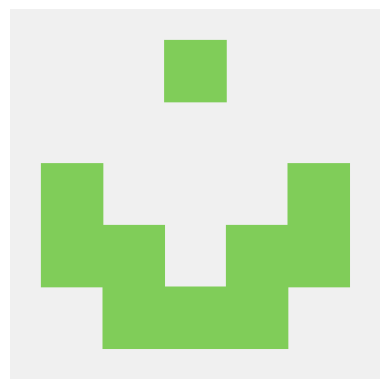

In [2]:

from PIL import Image
from io import BytesIO

# Open the image from the URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image.save('image.jpg')

# Display the image
import matplotlib.pyplot as plt
# Display the image in the cell output
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


### Run the following code to test functionality of OpenCV with 'image.jpg' file



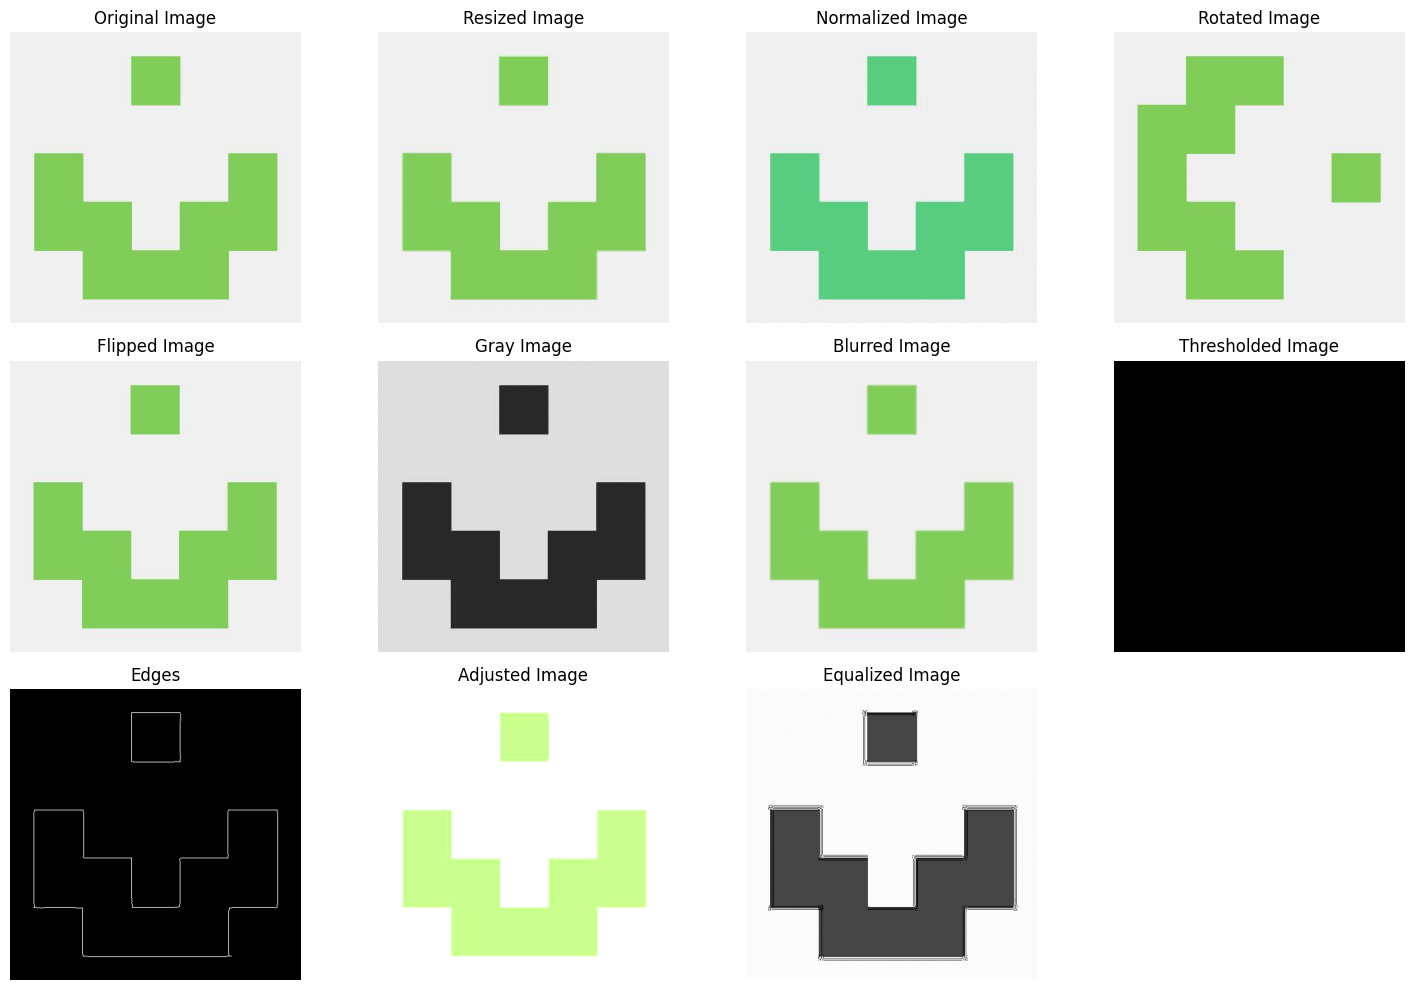

In [3]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the sample image
image = cv2.imread('image.jpg')

# Define new dimensions for resizing
new_width, new_height = 224, 224  # Example dimensions

# Resize the image
resized_image = cv2.resize(image, (new_width, new_height))

# Normalize pixel values
normalized_image = image / 255.0

# Rotate the image
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Flip the image
flipped_image = cv2.flip(image, 1)

# Grayscale conversion
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur for noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Threshold the image
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Edge detection using Canny
edges = cv2.Canny(image, 100, 200)

# Adjust brightness and contrast
alpha, beta = 1.5, 10  # Contrast and brightness control
adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Apply histogram equalization (improves contrast)
gray_equalized = cv2.equalizeHist(gray_image)

# Display the images using matplotlib
images = {
    'Original Image': cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    'Resized Image': cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB),
    'Normalized Image': normalized_image,
    'Rotated Image': cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB),
    'Flipped Image': cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB),
    'Gray Image': gray_image,
    'Blurred Image': cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB),
    'Thresholded Image': thresholded_image,
    'Edges': edges,
    'Adjusted Image': cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB),
    'Equalized Image': gray_equalized
}

plt.figure(figsize=(15, 10))
for i, (title, img) in enumerate(images.items()):
    plt.subplot(3, 4, i + 1)
    if len(img.shape) == 2:  # Grayscale image
        plt.imshow(img, cmap='gray')
    else:  # Color image
        plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()



> NOTES:
    > - Make sure to replace `'image.jpg'` with the path to your image file.
    > - You can adjust the parameters in the functions to suit your requirements.
    > - The `cv2.waitKey(0)` function waits indefinitely for a key press to close the windows. You can change the argument to specify the delay in milliseconds.
    > - The `cv2.destroyAllWindows()` function closes all windows when the script ends.
    > - You can run these commands in a Python script or a Jupyter notebook to visualize the results.
    >
    >





# **Image Processing on the Fly (Part 2)**


## Defining functions to perform image preprocessing with OpenCV

In this section, we will define functions to perform common image preprocessing tasks using OpenCV. These functions will help you resize images, normalize pixel values, and apply data augmentation techniques.


### Resizing Images



In [4]:

def resize_image(image, target_size):
    """
    Resize the input image to the target size.

    Parameters:
    image (numpy array or PIL Image): The input image to be resized.
    target_size (tuple): The desired size of the output image (width, height).

    Returns:
    resized_image (numpy array or PIL Image): The resized image.
    """
    # Import necessary libraries
    from PIL import Image
    import numpy as np

    # Check if the input image is a numpy array
    if isinstance(image, np.ndarray):
        # Convert numpy array to PIL Image
        image = Image.fromarray(image)

    # Resize the image using PIL's resize method
    resized_image = image.resize(target_size, Image.ANTIALIAS)

    # If the original image was a numpy array, convert the resized image back to numpy array
    if isinstance(image, np.ndarray):
        resized_image = np.array(resized_image)

    return resized_image

print(resize_image.__doc__)



Resize the input image to the target size.

Parameters:
image (numpy array or PIL Image): The input image to be resized.
target_size (tuple): The desired size of the output image (width, height).

Returns:
resized_image (numpy array or PIL Image): The resized image.



### Normalizing Pixel Values

Below is a Python method with pseudocode for normalizing pixel values:



In [5]:

def normalize_image(image):
    # Normalize pixel values to the range [0, 1]
    normalized_image = image / 255.0
    return normalized_image



### Data Augmentation

Below is a Python method with pseudocode for data augmentation:


In [6]:

def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    
    for image, label in zip(images, labels):
        # Perform data augmentation on the image
        augmented_image = apply_augmentation(image)
        
        # Add the original and augmented images to the list
        augmented_images.append(image)
        augmented_images.append(augmented_image)
        
        # Add the corresponding labels
        augmented_labels.append(label)
        augmented_labels.append(label)
    
    return augmented_images, augmented_labels


## Using simple functions to perform image preprocessing


## Full Python Code for Image Preprocessing

To use the next cell block, we will need to have the code above in a seperate python script file labeled `image_preprocessing.py` and import it into the notebook.

I've included the code below for reference.

```python

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def resize_image(image, target_size):
    """
    Resize the input image to the target size.

    Parameters:
    image (numpy array or PIL Image): The input image to be resized.
    target_size (tuple): The desired size of the output image (width, height).

    Returns:
    resized_image (numpy array or PIL Image): The resized image.
    """
    # Check if the input image is a numpy array
    if isinstance(image, np.ndarray):
        # Convert numpy array to PIL Image
        image = Image.fromarray(image)

    # Resize the image using PIL's resize method
    resized_image = image.resize(target_size, Image.ANTIALIAS)

    # If the original image was a numpy array, convert the resized image back to numpy array
    if isinstance(image, np.ndarray):
        resized_image = np.array(resized_image)

    return resized_image

def normalize_image(image):
    # Normalize pixel values to the range [0, 1]
    normalized_image = image / 255.0
    return normalized_image

def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    
    for image, label in zip(images, labels):
        # Perform data augmentation on the image
        augmented_image = apply_augmentation(image)
        
        # Add the original and augmented images to the list
        augmented_images.append(image)
        augmented_images.append(augmented_image)
        
        # Add the corresponding labels
        augmented_labels.append(label)
        augmented_labels.append(label)
    
    return augmented_images, augmented_labels

def apply_augmentation(image):
    # Apply data augmentation techniques such as rotation, flipping, etc.
    augmented_image = cv2.flip(image, 1)  # Flip the image horizontally
    return augmented_image

```


In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Import the image preprocessing functions
from image_preprocessing import resize_image, normalize_image, apply_augmentation


# Example usage of the image preprocessing functions
image = cv2.imread('image.jpg')  # Load an image using OpenCV
resized_image = resize_image(image, (224, 224))  # Resize the image to (224, 224)
normalized_image = normalize_image(resized_image)  # Normalize the pixel values
augmented_image = apply_augmentation(image)  # Apply data augmentation

# Display the original and preprocessed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.title('Original Image')

plt.subplot(1, 3, 2)

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

plt.title('Resized Image')

plt.subplot(1, 3, 3)

plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

plt.title('Augmented Image')

plt.show()



ImportError: cannot import name 'resize_image' from 'image_preprocessing' (/Users/mikey/Docs/git-repo-loc/SmartVision/software-testing/image_preprocessing/image_preprocessing.py)

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# URL of a random open-source camera image
image_url = 'https://picsum.photos/800/600'

# Send a GET request to the URL
response = requests.get(image_url)

# Open the image and save it as 'image.jpg'
image = Image.open(BytesIO(response.content))
image.save('image.jpg')

print('Image downloaded and saved as image.jpg')
